## <b><font color=red>ASSIGNMENT:</b></font> Comparision of SimpleRNN, SimpleRNN(2), GRU, GRU(2) for prediction of high price of MSFT on the NASDAQ stock exchange


<p><b><font color=red>Tasks:</p></b>
<p>High Price -> Comparison of SimpleRNN, SimpleRNN(2), GRU, GRU(2)</p>
<p>Plot -> Predict the normalized data; plot on the actual scale</p>

<b><p><font color=green>Assumption:</p></b>
<p>x_step=50</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Input,GRU

In [2]:
def convert_data(data, x_step):
  x_data = []
  y_data = []
  for i in range(len(data) - x_step):
    x_data.append(data[i:i+x_step])
    y_data.append(data[i+x_step])
  return np.array(x_data), np.array(y_data)

In [3]:
!pip install yfinance

In [4]:
import yfinance as yf

ms=yf.download('MSFT',start='2012-01-01',end='2025-08-31')

/tmp/ipython-input-4251792154.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ms=yf.download('MSFT',start='2012-01-01',end='2025-08-31')
[*********************100%***********************]  1 of 1 completed


In [5]:
from sklearn.preprocessing import MinMaxScaler

train =ms.loc[:"2024"].High.values
test =ms.loc["2025":].High.values
scaler = MinMaxScaler()
train_scaled=scaler.fit_transform(train)
test_scaled=scaler.transform(test)

x_step=50

X_train,y_train = convert_data(train_scaled,x_step)
X_test,y_test = convert_data(test_scaled,x_step)

# <font color=red>Stage I: </font> SimpleRNN

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0075
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.4329e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 3.3249e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.4444e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.8626e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.7172e-04
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.6734e-04
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.4256e-04
Epoch 9/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.2691e-04
Epoch 10/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.0998e-04
Epoch 11/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 9.8867e-05
Epoch 12/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.1549e-04
Epoch 13/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 8.9107e-05
Epoch 14/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.6578e-05

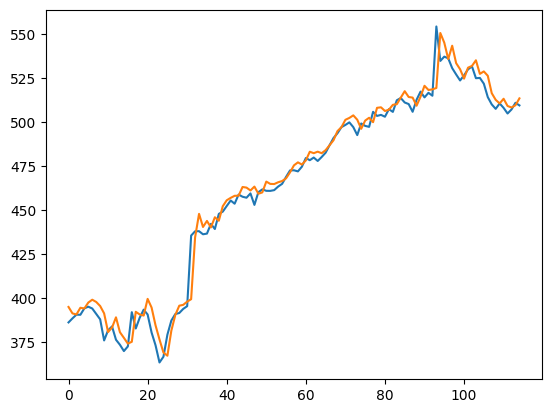

In [6]:
model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(scaler.inverse_transform(y_test))
plt.plot(scaler.inverse_transform(predicted))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


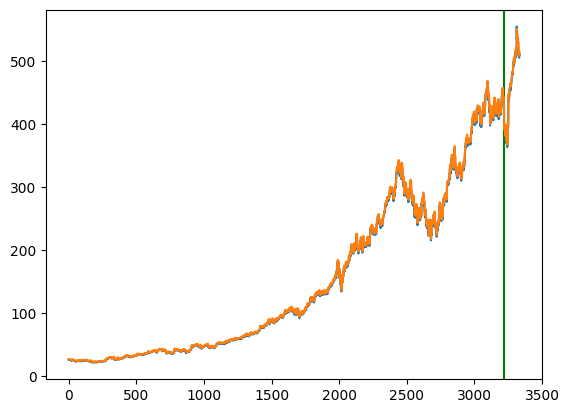

In [7]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(scaler.inverse_transform((real)))
plt.axvline(len(y_train), color="g")
plt.plot(scaler.inverse_transform((predicted)))

# <font color=red>Stage II: </font> SimpleRNN(2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0304
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0013
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 4.9580e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 3.1031e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 2.8293e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.8871e-04
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.1790e-04
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 1.6204e-04
Epoch 9/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.5064e-04
Epoch 10/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.7955e-04
Epoch 11/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 1.3497e-04
Epoch 12/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.4054e-04
Epoch 13/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.2225e-04
Epoch 14/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 1.1874

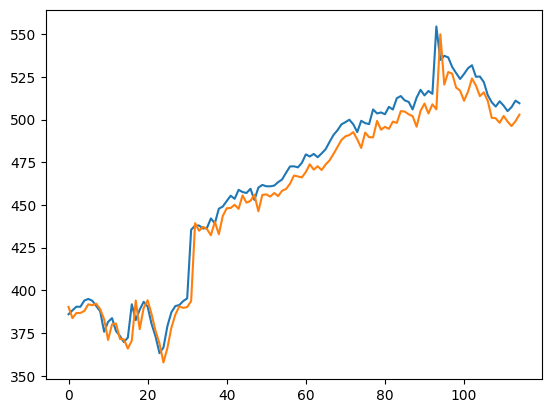

In [8]:
model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(units=64,return_sequences=True))
model.add(SimpleRNN(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(scaler.inverse_transform(y_test))
plt.plot(scaler.inverse_transform(predicted))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


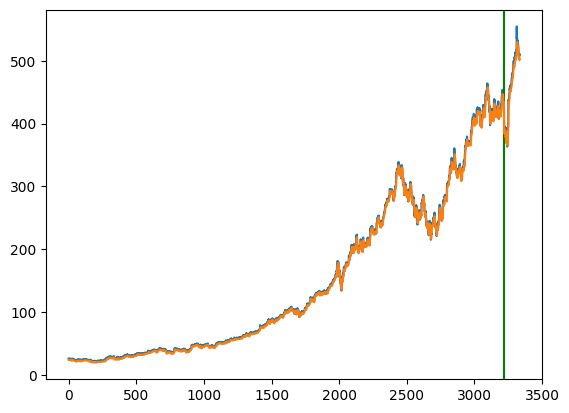

In [11]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(scaler.inverse_transform((real)))
plt.axvline(len(y_train), color="g")
plt.plot(scaler.inverse_transform((predicted)))

# <font color=red>Stage III: </font> GRU

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0073
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 2.9444e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 2.6745e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 2.4069e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 2.2031e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1.5723e-04
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1.5956e-04
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.5719e-04
Epoch 9/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.6456e-04
Epoch 10/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.2647e-04
Epoch 11/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1.4233e-04
Epoch 12/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 1.4194e-04
Epoch 13/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.1636e-04
Epoch 14/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 1.

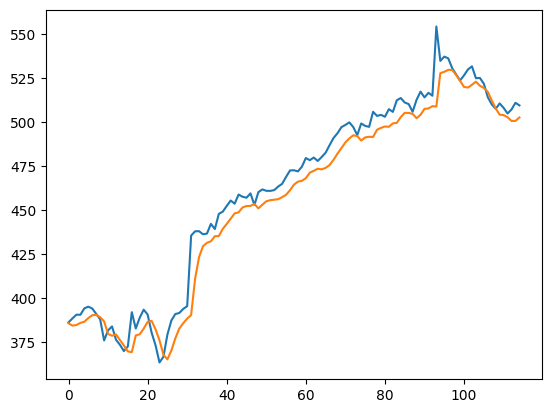

In [10]:
model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(GRU(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(scaler.inverse_transform(y_test))
plt.plot(scaler.inverse_transform(predicted))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


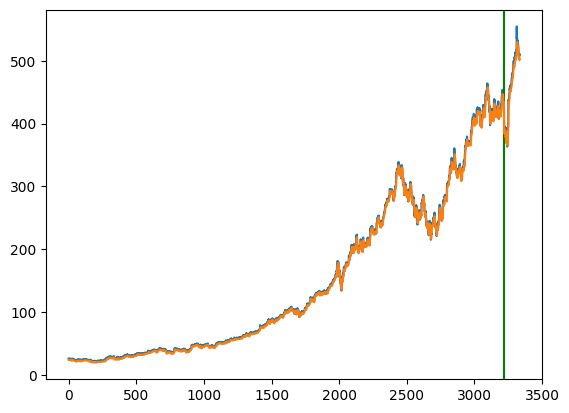

In [12]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(scaler.inverse_transform((real)))
plt.axvline(len(y_train), color="g")
plt.plot(scaler.inverse_transform((predicted)))

# <font color=red>Stage IV: </font> GRU(2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 50, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,889 (148.00 KB)

 Trainable params: 37,889 (148.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 0.0036
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 7.3985e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 5.3851e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 4.7332e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - loss: 3.5300e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 4.4773e-04
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 3.0953e-04
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 3.0577e-04
Epoch 9/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 3.7304e-04
Epoch 10/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 3.1275e-04
Epoch 11/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 2.8174e-04
Epoch 12/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 2.8915e-04
Epoch 13/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 2.2294e-04
Epoch 14/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/s

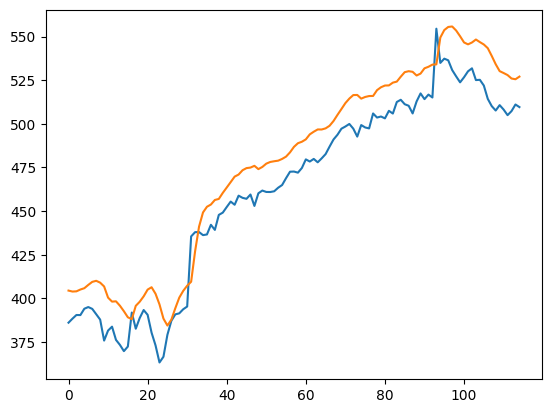

In [13]:
model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(GRU(units=64,return_sequences=True))
model.add(GRU(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(scaler.inverse_transform(y_test))
plt.plot(scaler.inverse_transform(predicted))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


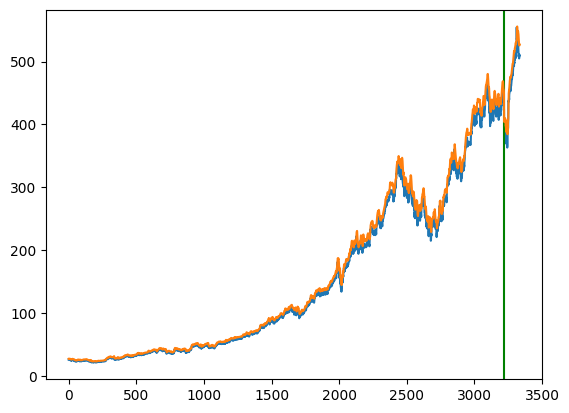

In [14]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(scaler.inverse_transform((real)))
plt.axvline(len(y_train), color="g")
plt.plot(scaler.inverse_transform((predicted)))